In [ ]:
%cd ..

/Volumes/GoogleDrive/My Drive/nerf-pytorch


In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/nerf-pytorch-master

Mounted at /content/drive
/content/drive/MyDrive/nerf-pytorch


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

from run_nerf import NeRF, Appendix, Encoder, Embedder, get_embedder

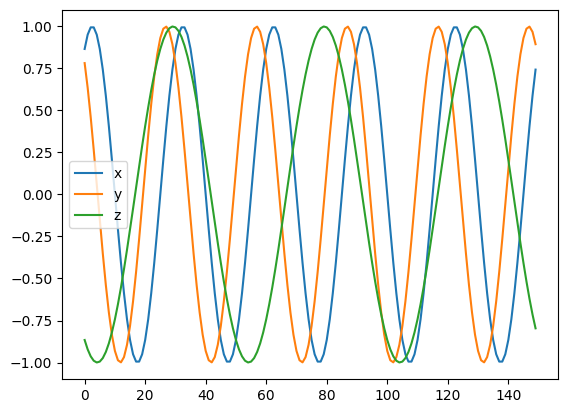

In [24]:
k=10
omega_x = 3
omega_y = 3
omega_z = 5

phi_x = np.pi/3
phi_y = 5*np.pi/7
phi_z = 4*np.pi/3

t = np.arange(k*omega_x*omega_z)

x = np.sin(2*np.pi*t/omega_x/k + phi_x)
y = np.sin(2*np.pi*t/omega_y/k + phi_y)
z = np.sin(2*np.pi*t/omega_z/k + phi_z)

plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.legend(("x", "y", "z"))
plt.show()

x = torch.tensor(x).reshape((-1,1))
y = torch.tensor(y).reshape((-1,1))
z = torch.tensor(z).reshape((-1,1))
positions = torch.hstack((x,y,z,))


In [25]:
embedder, embedder_dims = get_embedder(multires=10)
encoder = None
with open("pickle_files/test/050000.pkl","rb") as f:
        encoder = pickle.load(f)
encoder = encoder[0].encoder_0
encoder.to('cuda')

view_angles = torch.tensor([ 0.4432,  0.3846, -0.8097,  0.4288,  0.3752, -0.7241,  0.9034,  0.9270,
        0.6897,  0.7748,  0.6955, -0.9988,  0.6322,  0.7185, -0.0487,  0.9797,
        0.9995,  0.0972, -0.2006,  0.0325, -0.9953, -0.3930,  0.0650, -0.1936,
        -0.9195, -0.9979,  0.9811])
view_angles = view_angles.reshape((1,-1))
inputs = torch.hstack((embedder(positions), view_angles.repeat((positions.shape[0],1))))
inputs = torch.tensor(inputs, dtype=torch.float32).to('cuda')
outputs : torch.Tensor = encoder(inputs)[1]

np.savetxt("visualisations/data/box_inputs.csv", positions.cpu().detach().numpy(), delimiter=",")
np.savetxt("visualisations/data/box_outputs.csv", outputs.cpu().detach().numpy(), delimiter=",")

<ipython-input-25-dba583779680>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs, dtype=torch.float32).to('cuda')
